> ODE求解速度过慢，还有进一步优化空间
## TODO
- [ ] 改写Bonan公式，使起边界条件，以及sink的设定更加清楚
- [ ] 传入中间变量，优化ODE效率

In [9]:
include("src/Richards.jl")
# Define the function representing the system of ODEs for soil moisture transport

# van Genuchten parameters
# θs = 0.287  # Saturated water content
# θr = 0.075  # Residual water content
# α = 0.027  # 1/cm
param = (; θs=0.287, θr=0.075, Ksat=34 / 3600, α=0.027, n=3.96, m=1)
θ0 = 0.267
ψ0 = van_Genuchten_ψ(θ0; param)

n = 150
Δz = ones(n) # Δz₊ₕ
z, z₋ₕ, z₊ₕ, Δz₊ₕ = soil_depth_init(Δz)


(z = [-0.5, -1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5, -8.5, -9.5  …  -140.5, -141.5, -142.5, -143.5, -144.5, -145.5, -146.5, -147.5, -148.5, -149.5], z₊ₕ = [-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0, -9.0, -10.0  …  -141.0, -142.0, -143.0, -144.0, -145.0, -146.0, -147.0, -148.0, -149.0, -150.0], dz₊ₕ = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5])

In [10]:
using JLD2

u0 = fill(0.1, n) |> collect # Example initial soil moisture profile
tspan = (0.0, 0.8*3600)  # Time span for the simulation

bonan = load("data/output_bonan.jld2")
p = Soil{Float64}(; n=150, ψ0, z, z₊ₕ, Δz, Δz₊ₕ, param)
# 3 mm per day
p.sink .= 0.3 / 86400
p


Soil{Float64}
  n: Int64 150
  z: Array{Float64}((150,)) [-0.5, -1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5, -8.5, -9.5  …  -140.5, -141.5, -142.5, -143.5, -144.5, -145.5, -146.5, -147.5, -148.5, -149.5]
  z₊ₕ: Array{Float64}((150,)) [-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0, -9.0, -10.0  …  -141.0, -142.0, -143.0, -144.0, -145.0, -146.0, -147.0, -148.0, -149.0, -150.0]
  Δz: Array{Float64}((150,)) [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  Δz₊ₕ: Array{Float64}((150,)) [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]
  u: Array{Float64}((150,)) [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
  Q: Array{Float64}((150,)) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  K: Array{Float64}((150,)) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 

In [11]:
prob = ODEProblem(RichardsEquation, u0, tspan, p);
@time sol = solve(prob, Tsit5(), reltol=1e-6, abstol=1e-6, saveat=200);
# nothing

  0.482767 seconds (538.74 k allocations: 28.129 MiB, 22.66% compilation time: 100% of which was recompilation)


retcode: Success
Interpolation: 1st order linear
t: 16-element Vector{Float64}:
    0.0
  200.0
  400.0
  600.0
  800.0
 1000.0
 1200.0
 1400.0
 1600.0
 1800.0
 2000.0
 2200.0
 2400.0
 2600.0
 2800.0
 2880.0
u: 16-element Vector{Vector{Float64}}:
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
 [0.26628005610805994, 0.26463743078180474, 0.2625208841487027, 0.25973723092511397, 0.2559727327239991, 0.25070914371459735, 0.2430477877269483, 0.23139883090130517, 0.21310375992070105, 0.18518053240691737  …  0.09930555555555556, 0.09930555555555556, 0.09930555555555556, 0.09930555555555556, 0.09930555555555556, 0.09930555555555556, 0.09930555555555556, 0.09930555555555556, 0.09930555555555556, 0.09930555555555556]
 [0.26670726991294025, 0.26606204973933034, 0.26529485190665575, 0.2643696224222919, 0.26324997174352455, 0.2618788876219129, 0.2601819097947911, 0.2580514552918033, 0.2553322155811435, 0.2517921460350445  …  0.098611111111111

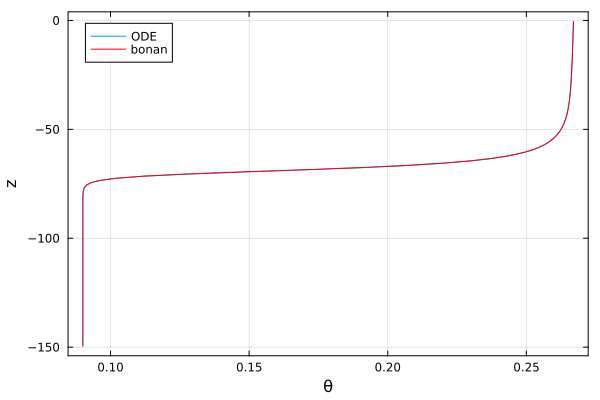

In [12]:
gr(; framestyle=:box)
_u = sol.u[end]
ψ = van_Genuchten_ψ.(_u; param)
p1 = plot(sol.u[end], z; xlabel="θ", ylabel="z", label="ODE")

plot!(p1, bonan["θ"], z; label="bonan", color=:red)
# p2 = plot(ψ, z; xlabel="ψ", ylabel="z", label="ψ")
# plot(p1, p2)

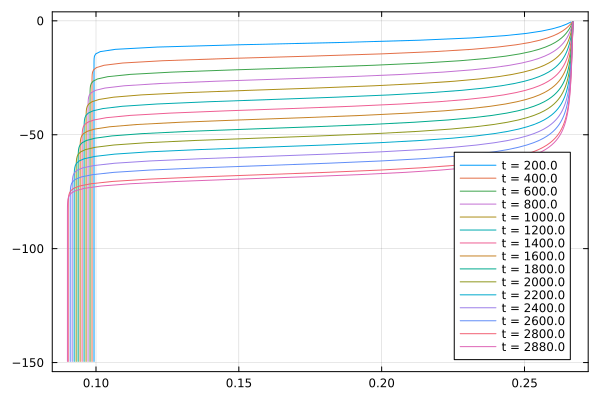

In [6]:
fig = plot()
for i in 1:length(sol.u)-1
  _u = sol.u[i+1]
  _t = sol.t[i+1]
  plot!(fig, _u, z; label="t = $_t")
end
# _u = cat(sol.u..., dims=2)
fig